# Question: What was the trend for the price of Bitcoin against Tether and were there any large price movements?

In [149]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Introduction
Bitcoin is a digital asset listed on mulitple exchanges with the price changing throughout the day due to numerous market factors. The trading pair we are looking at is *BTC/USDT*, where Tether (*USDT*) has a market value of *$1 USD*. This means that the prices given in the dataset represent the cost of *1 BTC* in US dollars.

The data we are using comes from Binance, the largest cryptocurrency exchange by trading volume. In particular, we are analysing tick data for the 26$^{th}$ May 2023, which is a record of every trade that occured in 24 hours on the spot market (not including any derivatives trading). 

The data can be accessed [here](https://www.binance.com/en/landing/data), with the type of data being *Trades*, *Spot*.

Our aim is to visualise the trading activity and analyse the price change throughout the day.

In [150]:
df = pd.read_csv('BTCUSDT-trades-2023-05-26.csv', header=None)
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')
df.head()

The dataset has 655755 rows and 7 columns.


,0,1,2,3,4,5,6
0,3126510315,26473.80,0.00223,59.036574,1685059200000,False,True
1,3126510316,26473.79,0.00199,52.682842,1685059200001,True,True
2,3126510317,26473.80,0.00110,29.121180,1685059200002,False,True
3,3126510318,26473.79,0.00263,69.626068,1685059200003,True,True
4,3126510319,26473.80,0.00147,38.916486,1685059200003,False,True



We can add a header to the dataframe using the documentation [provided](https://www.binance.com/en/landing/data).

In [151]:
df.columns = ['Trade_ID', 'Price', 'Quantity', 'Base_Quantity', 'Time', 'Was_the_buyer_the_maker?', 'Best_Price?']
df.head(3)

,Trade_ID,Price,Quantity,Base_Quantity,Time,Was_the_buyer_the_maker?,Best_Price?
0,3126510315,26473.80,0.00223,59.036574,1685059200000,False,True
1,3126510316,26473.79,0.00199,52.682842,1685059200001,True,True
2,3126510317,26473.80,0.00110,29.121180,1685059200002,False,True


## Data explanation
1. __Trade_ID__: A unique transaction hash given to each transaction. 
2. __Price__: Market price for _1 BTC_.
3. __Quantity__: Amount of _BTC_ brought or sold.
4. __Base_Quantity__: Value of transaction in _USDT_.
5. __Time__: Unix timestamp for when the transaction took place.
            For example: 1685059200000 is Friday 26$^{th}$ May 00:00:00
6. __Was_the_buyer_the_maker?__: Indication of whether the buyer took the ask price.
7. __Best_Price?__: Did the transaction incur any [slippage](https://www.binance.com/en/feed/post/158140)?

For the purposes of our analysis, we do not require columns $1$, $4$, $6$, $7$. Note, we can calculate the base quantity for any transaction by multiplying the price and quantity and for the entire dataset and there were no transactions that occured slippage.

In [176]:
# All orders were executed at the best price
df.query('`Best_Price?` == False')

,Trade_ID,Price,Quantity,Base_Quantity,Time,Was_the_buyer_the_maker?,Best_Price?


In [177]:
df_pqt = df.drop(labels=['Trade_ID', 'Base_Quantity', 'Was_the_buyer_the_maker?', 'Best_Price?'], axis=1, inplace=False)

In [178]:
df_pqt.head(3)

,Price,Quantity,Time
0,26473.80,0.00223,1685059200000
1,26473.79,0.00199,1685059200001
2,26473.80,0.00110,1685059200002


We can also convert the time from a unix timestamp to the time in seconds.

In [179]:
# Convert Unix timestamp to datetime, using the to_datetime method
df_pqt['Time'] = pd.to_datetime(df['Time'], unit='ms')

## Data visualisation

For the purposes of analysing the trend of the price of Bitcoin, we can collate the data to show the average price for each minute, giving 1440 datapoints.

In [180]:
df_pqt

,Price,Quantity,Time
0,26473.80,0.00223,2023-05-26 00:00:00.000
1,26473.79,0.00199,2023-05-26 00:00:00.001
2,26473.80,0.00110,2023-05-26 00:00:00.002
3,26473.79,0.00263,2023-05-26 00:00:00.003
4,26473.80,0.00147,2023-05-26 00:00:00.003
...,...,...,...
655750,26705.92,0.00125,2023-05-26 23:59:59.991
655751,26705.93,0.00773,2023-05-26 23:59:59.996
655752,26705.92,0.00096,2023-05-26 23:59:59.997
655753,26705.93,0.00315,2023-05-26 23:59:59.998


In [181]:
df_pqt = df_pqt.groupby(pd.Grouper(key="Time", freq="1min")).mean()
df_pqt.head(3)

,Price,Quantity
Time,,
2023-05-26 00:00:00,26476.432582,0.022306
2023-05-26 00:01:00,26480.118146,0.010179
2023-05-26 00:02:00,26478.351292,0.038731


In [182]:
df_pqt = df_pqt.reset_index('Time')

In [183]:
# Tidying the time column
df_pqt['Time'] = pd.to_datetime(df_pqt['Time']).apply(lambda x: str(x.time()))
df_pqt

,Time,Price,Quantity
0,00:00:00,26476.432582,0.022306
1,00:01:00,26480.118146,0.010179
2,00:02:00,26478.351292,0.038731
3,00:03:00,26478.081212,0.013168
4,00:04:00,26479.377289,0.006377
...,...,...,...
1435,23:55:00,26708.843738,0.012597
1436,23:56:00,26708.846220,0.012436
1437,23:57:00,26709.438943,0.078564
1438,23:58:00,26709.905586,0.016196


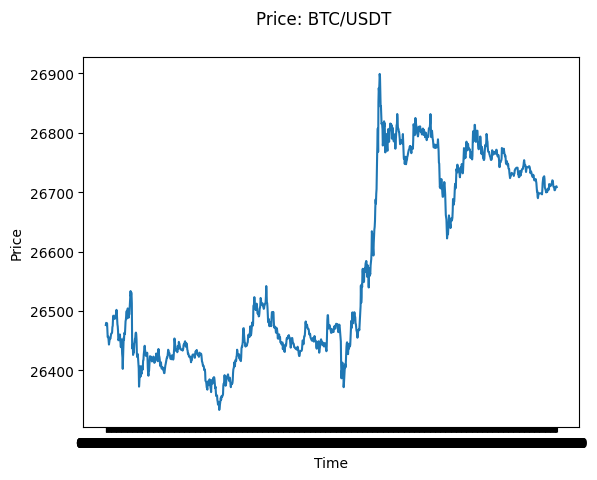

In [172]:
# Plotting the price against time
plt.plot(df_pqt.Time, df_pqt.Price)

# Adding titles
plt.suptitle("Price: BTC/USDT")
plt.xlabel("Time")
plt.ylabel("Price")

# Adjusting the x-axis denominations
plt.xticks()

plt.show()

## Conclusion

As we can see the price of Bitcoin varies greatly throughout the day but the overall trend seems to be positive. The difference between the highest and lowest price of Bitcoin is $2.30\%$, an indication of fairly significant market volitility. 

## Improvements
A few improvements could be a made to this project:
- Add the indices on the x-axis.
- Investigate the possible causes for the increase in the price of Bitcoin around midday.
- Further analysis could be conducted with the volume of trades, to find out whether a correlation exists.
- Compare the market volatility to other days